In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset yang digunakan merupakan dataset berisi informasi mengenai film dayng dapat diperoleh melalui link berikut:

https://www.kaggle.com/datasets/priy998/imdbsqlitedataset/code

# **Load Dataset**

In [ ]:
conn = sql.connect("movies.sqlite")

In [ ]:
df_movies = pd.read_sql_query('SELECT * FROM movies;', conn)

In [ ]:
df_movies.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


# DATA UNDERSTANDING

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


In [ ]:
df_movies.isnull().sum()

id                  0
original_title      0
budget              0
popularity          0
release_date        0
revenue             0
title               0
vote_average        0
vote_count          0
overview            3
tagline           822
uid                 0
director_id         0
dtype: int64

In [ ]:
df_movies=df_movies.drop(columns=['id','tagline','overview'])
df_movies.dtypes

original_title     object
budget              int64
popularity          int64
release_date       object
revenue             int64
title              object
vote_average      float64
vote_count          int64
uid                 int64
director_id         int64
dtype: object

In [ ]:
df_movies.head()

,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,uid,director_id
0,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,19995,4762
1,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,285,4763
2,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,206647,4764
3,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,49026,4765
4,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,49529,4766


# BUDGET

In [ ]:
df_movies['budget'].describe()

count    4.773000e+03
mean     2.922461e+07
std      4.078679e+07
min      0.000000e+00
25%      9.500000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [ ]:
df1=df_movies[['original_title', 'budget','revenue']].sort_values(by = 'budget', ascending = False).head(10)

In [ ]:
df1

,original_title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
6,Tangled,260000000,591794936
5,Spider-Man 3,258000000,890871626
13,The Lone Ranger,255000000,89289910
22,The Hobbit: The Desolation of Smaug,250000000,958400000
26,Captain America: Civil War,250000000,1153304495


[Text(0, 0, 'Pirates of the Caribbean: On Stranger Tides'),
 Text(1, 0, "Pirates of the Caribbean: At World's End"),
 Text(2, 0, 'Avengers: Age of Ultron'),
 Text(3, 0, 'Superman Returns'),
 Text(4, 0, 'John Carter'),
 Text(5, 0, 'Tangled'),
 Text(6, 0, 'Spider-Man 3'),
 Text(7, 0, 'The Lone Ranger'),
 Text(8, 0, 'The Hobbit: The Desolation of Smaug'),
 Text(9, 0, 'Captain America: Civil War')]

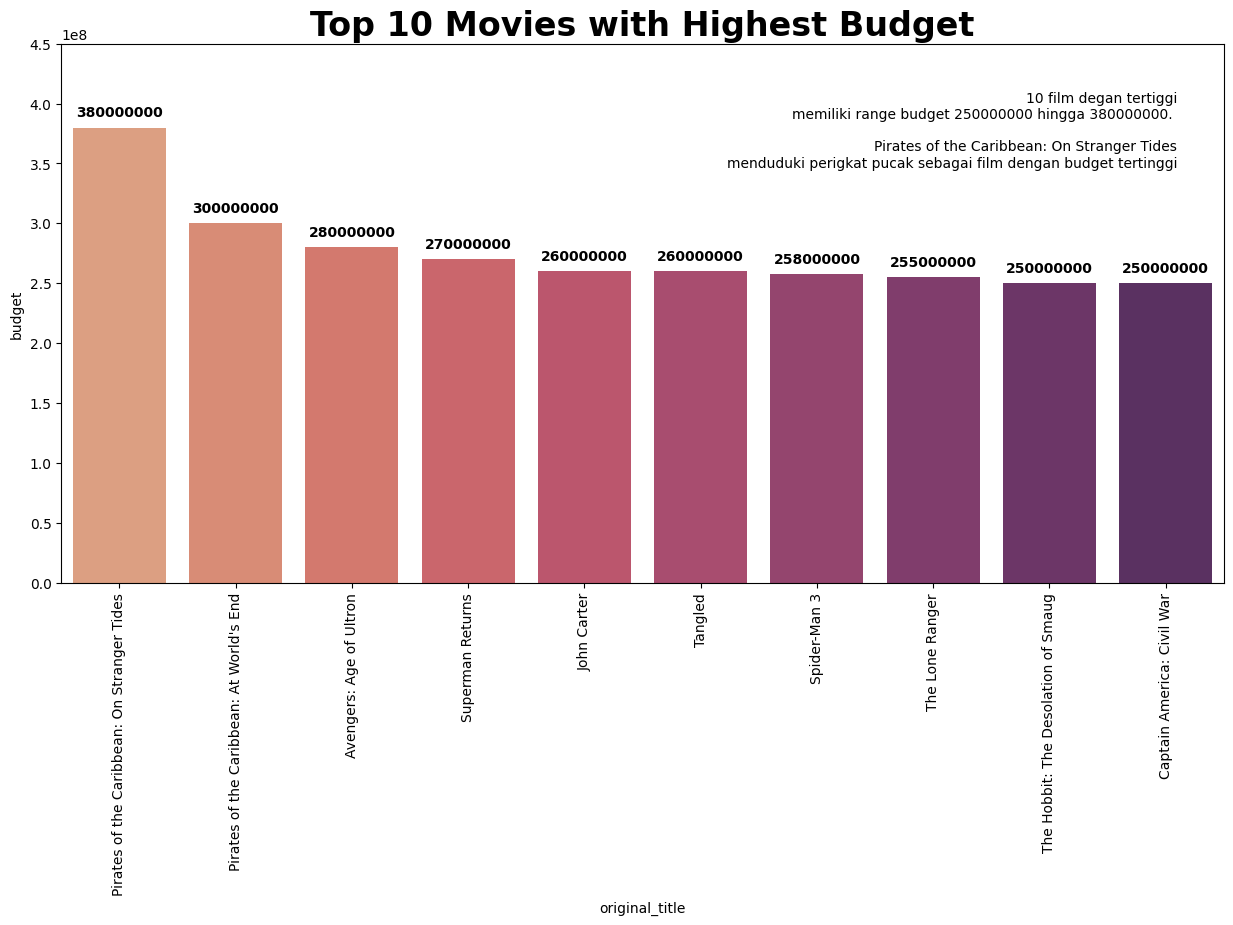

In [ ]:
#Figsize
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'original_title',y='budget',data=df1,ax=ax,
               palette=sns.color_palette("flare", n_colors=10, desat=1))

x = np.arange(len(df1['original_title']))
y = df1['budget']

for i, v in enumerate(y):
    ax.text(x[i], v+9000000, str(v), fontsize = 10, color='black', fontweight='bold', horizontalalignment='center')

#Title
plt.title('Top 10 Movies with Highest Budget', fontsize = 24, fontweight = 'bold', color = 'black')


text = '''
10 film degan tertiggi
memiliki range budget 250000000 hingga 380000000.

Pirates of the Caribbean: On Stranger Tides
menduduki perigkat pucak sebagai film dengan budget tertinggi

'''
ax.text(9.1,320000000,text,horizontalalignment='right',color='black',fontsize=10,fontweight='normal')

ax.set_ylim(0,450000000)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)



In [ ]:
df_budget = df_movies[['original_title', 'budget']].sort_values(by = 'budget', ascending = False).head(10)

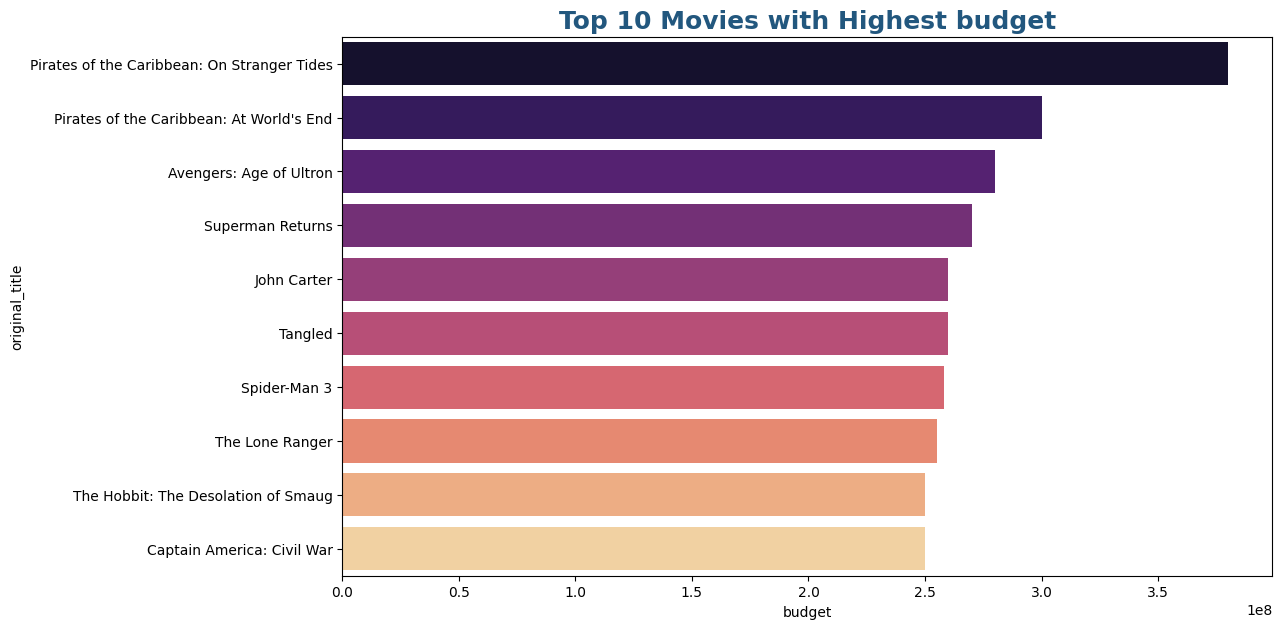

In [ ]:
#Figsize
fig, ax = plt.subplots(figsize=(12,7))

#Title
plt.title('Top 10 Movies with Highest budget', fontsize = 18, fontweight = 'bold', color = '#22577E')

#Barplot
sns.barplot(y = 'original_title', x = 'budget', data = df_budget, palette = 'magma')

plt.show()

# LINEPLOT

In [ ]:
title=df1['original_title']
budget=df1['budget']
revenue=df1['revenue']

<ipython-input-112-f1f384286381>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


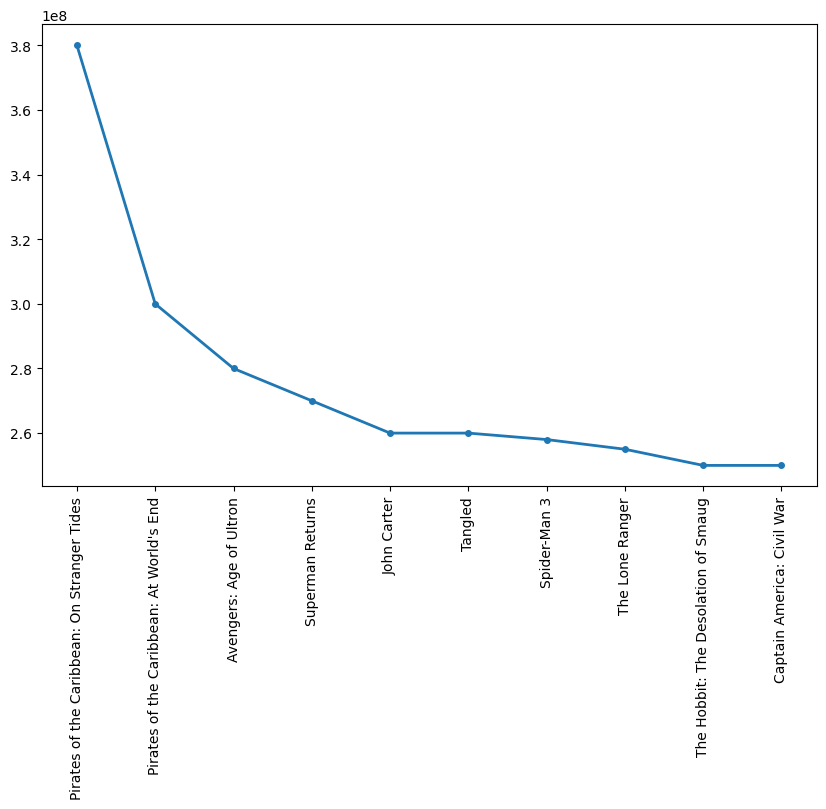

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(title, budget,linewidth = 2, marker = 'o', ms = 4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<ipython-input-114-4023f23ba84c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


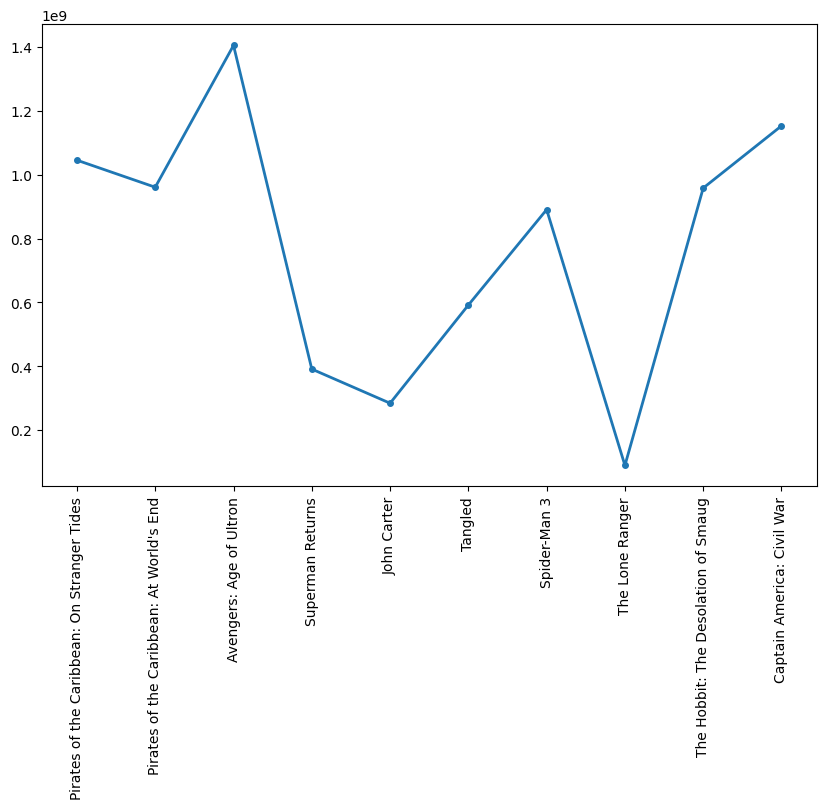

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(title, revenue, linewidth = 2, marker = 'o', ms = 4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<ipython-input-115-eb2578fc8d19>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


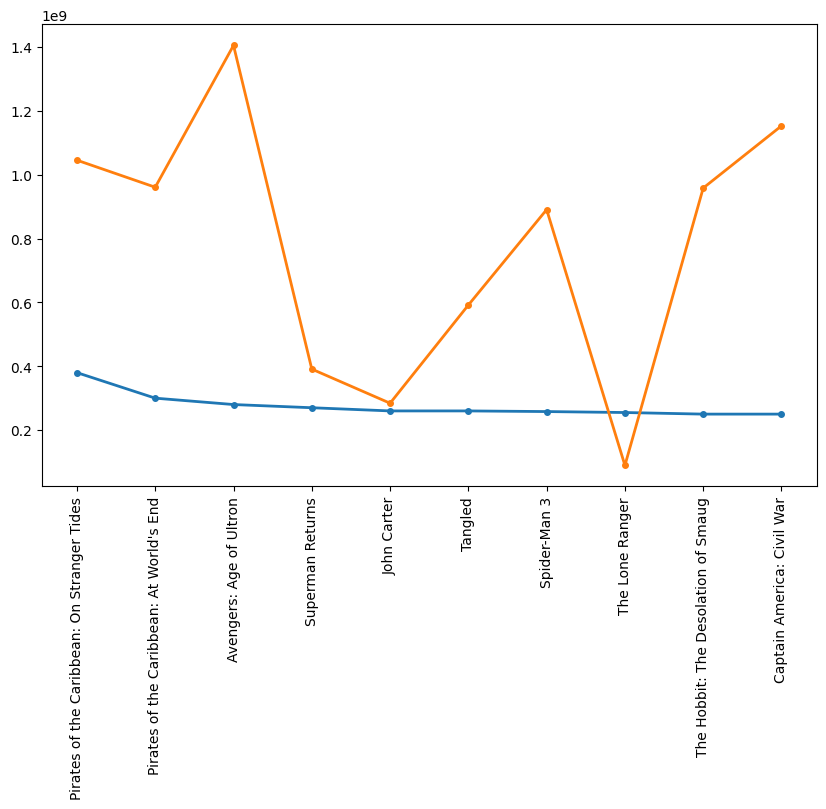

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(title, budget,linewidth = 2, marker = 'o', ms = 4)
plt.plot(title, revenue, linewidth = 2, marker = 'o', ms = 4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# RATE

In [ ]:
df_highrate = df_movies[['original_title', 'vote_average']].sort_values(by = 'vote_average', ascending = False).head(10)

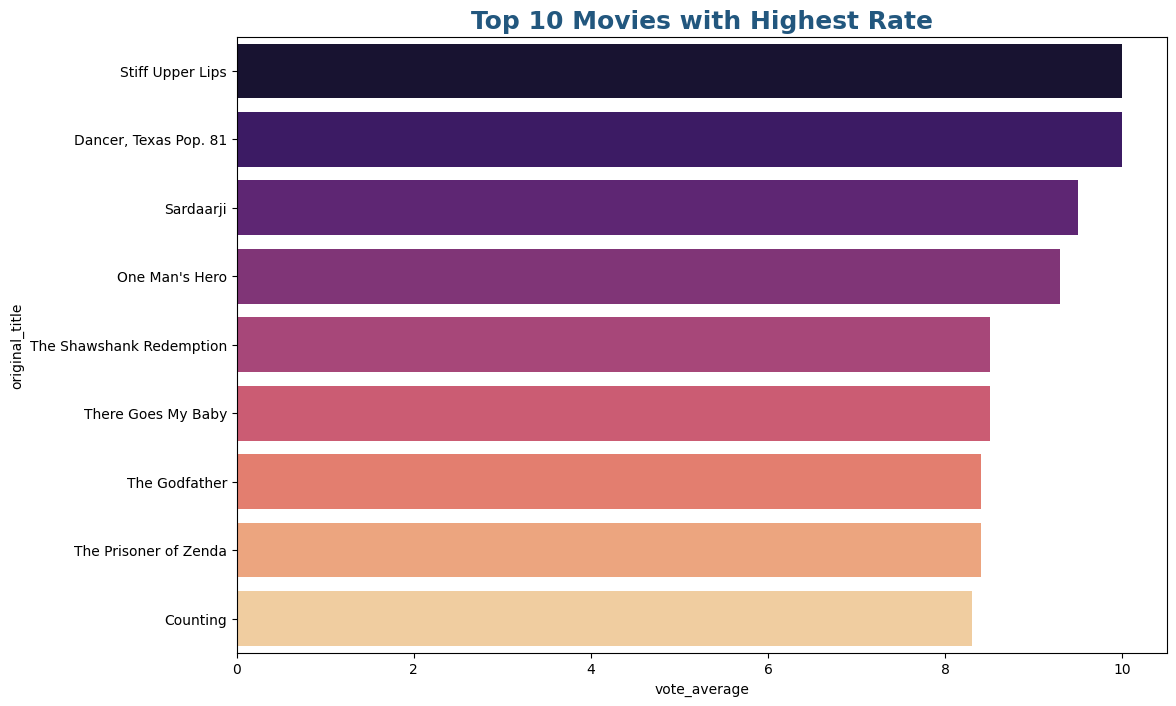

In [ ]:
#Figsize
plt.figure(figsize = (12,8))

#Title
plt.title('Top 10 Movies with Highest Rate', fontsize = 18, fontweight = 'bold', color = '#22577E')

#Barplot
sns.barplot(y = 'original_title', x = 'vote_average', data = df_highrate, palette = 'magma')
plt.show()

# POPULARITY

In [ ]:
df_popularity = df_movies[['original_title', 'popularity']].sort_values(by = 'popularity', ascending = False).head(10)

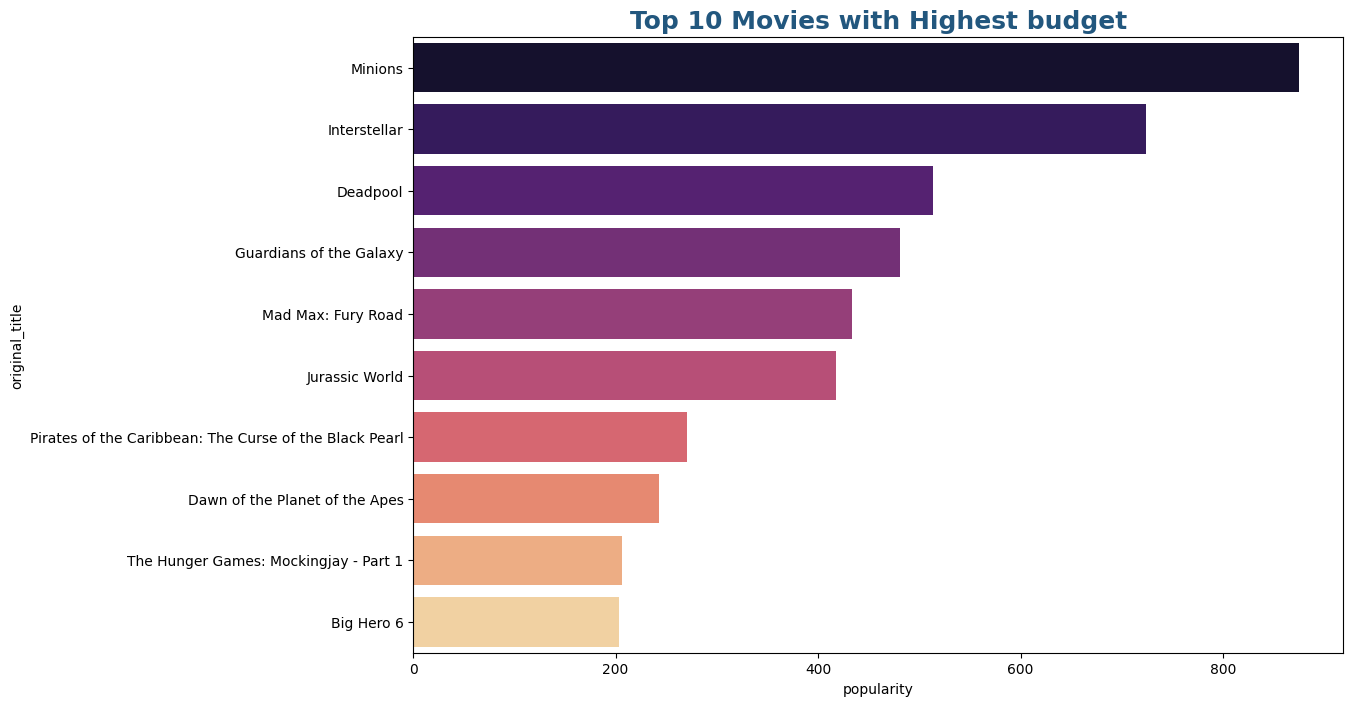

In [ ]:
#Figsize
plt.figure(figsize = (12,8))

#Title
plt.title('Top 10 Movies with Highest budget', fontsize = 18, fontweight = 'bold', color = '#22577E')

#Barplot
sns.barplot(y = 'original_title', x = 'popularity', data = df_popularity, palette = 'magma')
plt.show()

# DIRECTORS

In [ ]:
conn = sql.connect("movies.sqlite")
df_directors = pd.read_sql_query('SELECT * FROM directors;', conn)

In [ ]:
df_directors.head()

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [ ]:
#Missing Values pada data training
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax,
               palette=sns.color_palette("flare", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+2, str(v)+'%', fontsize = 11, color='gray', fontweight='bold')

title = '''
Missing Values Distribution of Dataset
'''
ax.text(17,85,title,horizontalalignment='right',color='black',fontsize=24,fontweight='bold')


text = '''
There are 19 (23.46%) from 81 features that have missing value
16 missing value in non numerical data (text or categorical)
3 missing value in numerical data

Top 5 with lots of missing values
PoolQC (text - categorical),
MiscFeature (text - categorical),
Alley (text - categorical),
Fence (text - categorical),
FireplaceQu (text - categorical)

'''
ax.text(17,40,text,horizontalalignment='right',color='black',fontsize=12,fontweight='normal')

ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)